Размер изображения: (525, 700)
Исходный размер: 2940000 байт
k = 1: 14000 байт (сжатие в 210.0 раз)
k = 5: 70000 байт (сжатие в 42.0 раз)
k = 20: 280000 байт (сжатие в 10.5 раз)
k = 50: 700000 байт (сжатие в 4.2 раз)
k = 100: 1400000 байт (сжатие в 2.1 раз)


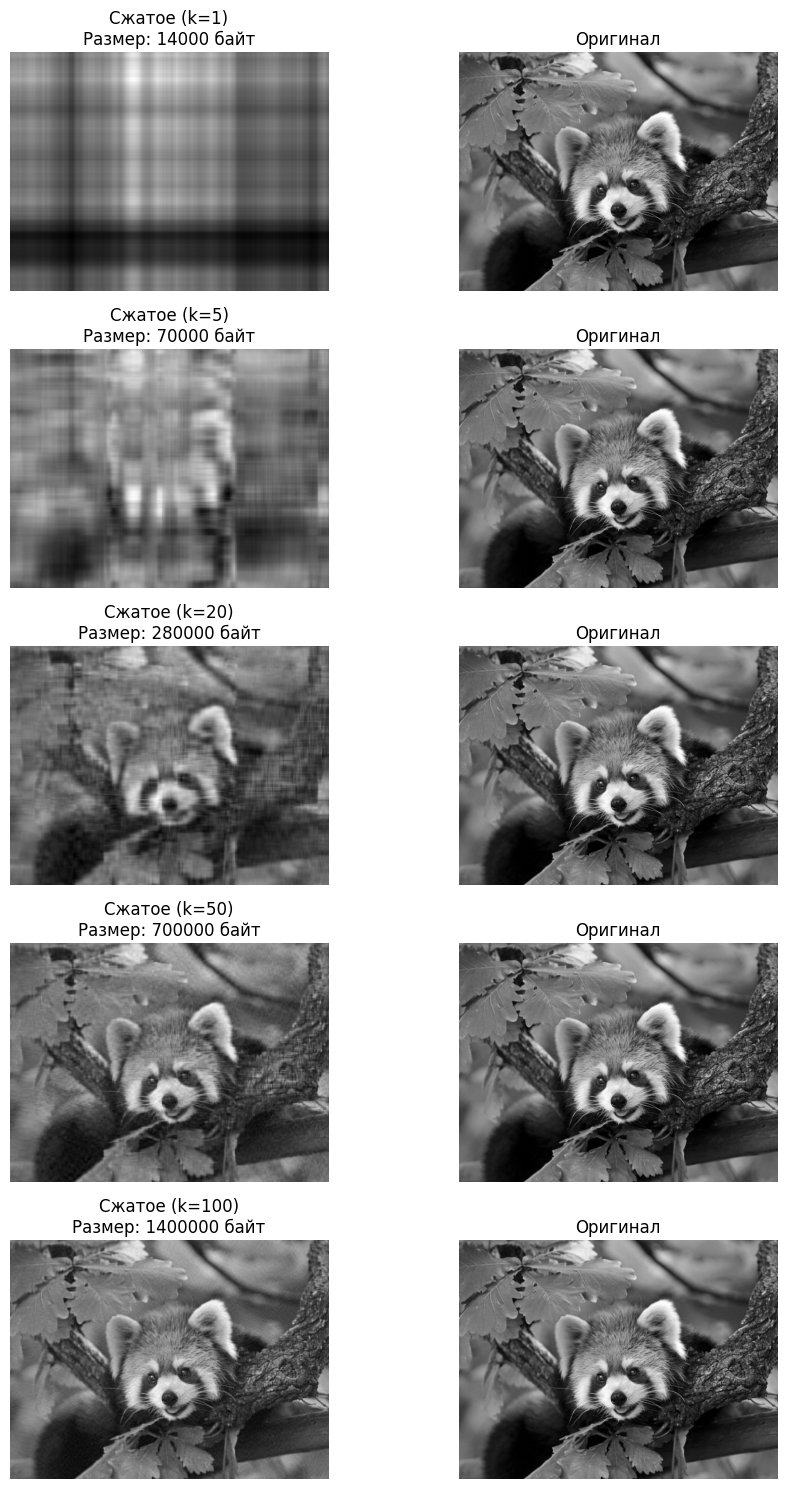

In [10]:
from skimage.color import rgb2gray
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. ЗАГРУЗКА И ПОДГОТОВКА ИЗОБРАЖЕНИЯ
img = Image.open('panda.jpg')  # ОБРАТИ ВНИМАНИЕ: название файла в КАВЫЧКАХ!
gray_img = rgb2gray(img)       # Превращаем цветное фото в чёрно-белое
print(f"Размер изображения: {gray_img.shape}")  # Показываем размеры (высота, ширина)

# 2. ВОЛШЕБНОЕ СЖАТИЕ (SVD - Singular Value Decomposition)
# Разбиваем изображение на 3 специальные матрицы
U, S, V_T = np.linalg.svd(gray_img, full_matrices=False)
S = np.diag(S)  # Превращаем S в диагональную матрицу

# 3. СЧИТАЕМ РАЗМЕРЫ ДАННЫХ
original_size = gray_img.nbytes  # Размер исходного изображения
print(f"Исходный размер: {original_size} байт")

# 4. СОЗДАЁМ ГРАФИК ДЛЯ СРАВНЕНИЯ
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

# 5. ПРОБУЕМ РАЗНЫЕ УРОВНИ СЖАТИЯ
compression_levels = [1, 5, 20, 50, 100]  # Сколько компонент оставляем

for i, r in enumerate(compression_levels):
    # 6. СОБИРАЕМ ИЗОБРАЖЕНИЕ ОБРАТНО (как конструктор)
    # Берём только самые важные части из каждой матрицы
    compressed_img = U[:, :r] @ S[:r, :r] @ V_T[:r, :]

    # 7. СЧИТАЕМ НОВЫЙ РАЗМЕР
    new_size = U[:, :r].nbytes + S[:r].nbytes + V_T[:r, :].nbytes
    compression_ratio = original_size / new_size  # Во сколько раз сжали
    print(f"k = {r}: {new_size} байт (сжатие в {compression_ratio:.1f} раз)")

    # 8. ПОКАЗЫВАЕМ РЕЗУЛЬТАТЫ
    # Слева - сжатое изображение
    axes[i, 0].imshow(compressed_img, cmap='gray')
    axes[i, 0].set_title(f"Сжатое (k={r})\nРазмер: {new_size} байт")
    axes[i, 0].axis('off')

    # Справа - оригинал (только для сравнения)
    axes[i, 1].imshow(gray_img, cmap='gray')
    axes[i, 1].set_title("Оригинал")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()